In [1]:
import sys
import os
import json
import matplotlib.pyplot as plt
sys.path.append(os.environ["CODE_REPOSITORY"])
from code_repository.hotones.thetools import *
from code_repository.load.load_simulations import LoadSimulations

In [2]:
external = os.path.join("/media","jofrony","2TB", 
                        "dardel", "current_bgd2","ablation", 
                        "supercomputer", "networks")
repository = os.path.join("/home","jofrony","Documents",
                          "Repositories","current_bgd2",
                          "ablation","supercomputer","networks")

In [3]:
name = "current_injection"
folder = "frequency"
parameters = {"start": 0.5, "end": 2.5}


In [4]:
e = Experiments()
e.add_experiment(name="current_injection",
                 color="black",
                 label="2 sec stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-24"),
                 output="network_output_2s_network-synapses_cell_ids_current_injection_dardel_2022-09-19-13-01-25.hdf5")
e.add_experiment(name="current_injection-FS",
                 color="black",
                 label="2 sec simulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-24"),
                 output="network_output_2s_ablations-FS-network-synapses_cell_ids_current_injection_dardel_2022-09-19-13-01-25.hdf5")  
e.add_experiment(name="current_injection-SPN",
                 color="black",
                 label="2 sec simulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-24"),
                 output="network_output_2s_ablations-SPN-network-synapses_cell_ids_current_injection_dardel_2022-09-19-13-01-25.hdf5")
e.add_experiment(name="current_injection-all",
                 color="black",
                 label="2 sec simulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-24"),
                 output="network_output_2s_ablations-all-network-synapses_cell_ids_current_injection_dardel_2022-09-19-13-01-25.hdf5")
e.experiments     

{'current_injection': {'color': 'black',
  'label': '2 sec stimulation',
  'network': 'network-synapses.hdf5',
  'path': '/media/jofrony/2TB/dardel/current_bgd2/ablation/supercomputer/networks/pdc_network_2022-08-24',
  'output': 'network_output_2s_network-synapses_cell_ids_current_injection_dardel_2022-09-19-13-01-25.hdf5'},
 'current_injection-FS': {'color': 'black',
  'label': '2 sec simulation',
  'network': 'network-synapses.hdf5',
  'path': '/media/jofrony/2TB/dardel/current_bgd2/ablation/supercomputer/networks/pdc_network_2022-08-24',
  'output': 'network_output_2s_ablations-FS-network-synapses_cell_ids_current_injection_dardel_2022-09-19-13-01-25.hdf5'},
 'current_injection-SPN': {'color': 'black',
  'label': '2 sec simulation',
  'network': 'network-synapses.hdf5',
  'path': '/media/jofrony/2TB/dardel/current_bgd2/ablation/supercomputer/networks/pdc_network_2022-08-24',
  'output': 'network_output_2s_ablations-SPN-network-synapses_cell_ids_current_injection_dardel_2022-09-19-1

In [5]:
sl = LoadSimulations(experiments=e)
sl.load_network_file(load_synapses=False)

Loading 20000 neurons with 15856878 synapses and 2434 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/ablation/supercomputer/networks/pdc_network_2022-08-24/simulation/network_output_2s_network-synapses_cell_ids_current_injection_dardel_2022-09-19-13-01-25.hdf5
Loading 20000 neurons with 15856878 synapses and 2434 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/ablation/supercomputer/networks/pdc_network_2022-08-24/simulation/network_output_2s_ablations-FS-network-synapses_cell_ids_current_injection_dardel_2022-09-19-13-01-25.hdf5
Loading 20000 neurons with 15856878 synapses and 2434 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/ablation/supercomputer/networks/pdc_network_2022-08-24/simulation/network_output_2s_ablations-SPN-network-synapses_cell_ids_current_injection_dardel_2022-09-19-13-01-25.hdf5
Loading 20000 neurons with 15856878 synapses and 2434 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/ablation/supercomputer/networks/p

In [6]:
%%time
neuron_type = "dSPN"
specific_trace_ids = sl.get_trace_ids(neuron_type=neuron_type)
frequency_analysis_dict = frequency_analysis(data_obj=sl, neuron_type=neuron_type, trace_ids=specific_trace_ids, parameters=parameters)

CPU times: user 1min 44s, sys: 6.36 s, total: 1min 50s
Wall time: 15min 42s


In [7]:
global_tmp = dict()

for name in frequency_analysis_dict.keys():
    global_tmp.update({name : {int(k): float(value) for k, value in frequency_analysis_dict[name].items() if float(value) > 0 }})

In [8]:
with open(os.path.join("frequency", f"{neuron_type}_frequency_analysis_dict.json"), "w") as f:
    json.dump(global_tmp, f)

In [9]:
colors = {"current_injection": striatum_colour_code[neuron_type],
         "current_injection-FS": "green" ,
         "current_injection-SPN": (127/255,42/255,255/255),
         "current_injection-all": (166/255,97/255,26/255)}

In [10]:
customize={plt.ylim: (0,45)}

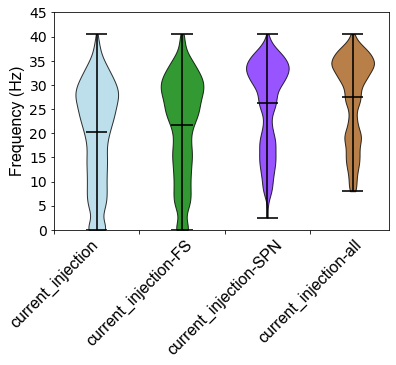

In [11]:
plot_violin_plot(frequency_dict=frequency_analysis_dict, experiment_names=e, colors=colors, name=neuron_type, folder="violin", save=True,customize=customize)

In [12]:
%%time
neuron_type = "iSPN"
specific_trace_ids = sl.get_trace_ids(neuron_type=neuron_type)
frequency_analysis_dict = frequency_analysis(data_obj=sl, neuron_type=neuron_type, trace_ids=specific_trace_ids, parameters=parameters)

CPU times: user 1min 20s, sys: 4.15 s, total: 1min 25s
Wall time: 15min 3s


In [13]:
global_tmp = dict()

for name in frequency_analysis_dict.keys():
    global_tmp.update({name : {int(k): float(value) for k, value in frequency_analysis_dict[name].items() if float(value) > 0 }})

In [14]:
with open(os.path.join("frequency", f"{neuron_type}_frequency_analysis_dict.json"), "w") as f:
    json.dump(global_tmp, f)

In [15]:
colors = {"current_injection": striatum_colour_code[neuron_type],
         "current_injection-FS": "green" ,
         "current_injection-SPN": (127/255,42/255,255/255),
         "current_injection-all": (166/255,97/255,26/255)}

In [16]:
customize={plt.ylim: (0,45)}

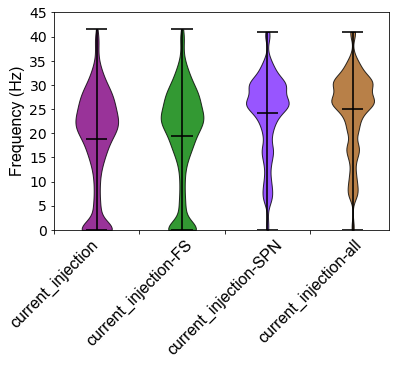

In [17]:
plot_violin_plot(frequency_dict=frequency_analysis_dict, experiment_names=e, colors=colors, name=neuron_type, folder="violin", save=True, customize=customize)